# Sales Prediction for BigMart Supermarkets

The dataset used for building this model was gotten from Kaggle. Although, the goal of this project is to prepare adequately for the Sundry Foods project. 

We would do this by training a model to predict sales for BigMart products

### Things to note:
<ul>
    <li> This is a $\textbf{Supervised Learning task}$ as we are given the label(sale prices of some of the products) </li>
    <li> A $\textbf{Regression Task}$, since our algorithm is expected to predict the sale price for a given product and store.</li>
    <li> The performance measure we will be using is $\textbf{RMSE}$, i.e Root Mean Squared Error </li>
</ul>

### Assumptions prior to commencement of the project
The following are the possible outcomes we might expect from our analysis according to the available data.
<ul>
    <li> Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.</li>
    <li> Stores located in densely populated areas should have higher sales because of more demand.</li>
    <li> Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place. </li>
    <li> Stores having similar establishments nearby should have less sales because of more competition. </li>
    <li> Stores located within popular marketplaces should have higher sales because of better access to customers.</li>
    <li> Daily use products should have a higher tendency to sell as compared to the specific use products.</li>
    <li> Products accompanied with attractive offers and discounts will sell more.</li>
</ul>
    

### Things to expect:
<ul>
    <li>Comprehensive Exploratory data analysis</li>
    <li> Data visualization</li>
    <li> Data Preprocessing</li>
    <li> Feature Engineering </li>
    <li> Model Training </li>
    <li> Hyperparameter optimization</li>
    <li> Model Evaluation </li>
</ul>




In [188]:
#importing the neccessary libraries needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [189]:
#reading the datasets into our workspace
train_df = pd.read_csv("C:\\Users\\jetta\\OneDrive\\Desktop\\BigMart\\big_mart_train.csv")
test_df =  pd.read_csv("C:\\Users\\jetta\\OneDrive\\Desktop\\BigMart\\big_mart_test.csv")

In [190]:
#inspecting the training set
train_df.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1286,FDB51,6.920,LF,0.038672,Dairy,64.2852,OUT017,2007,NaN,Tier 2,Supermarket Type1,438.0964
6605,DRL35,NaN,Low Fat,0.030555,Hard Drinks,41.8770,OUT027,1985,Medium,Tier 3,Supermarket Type3,1125.2020
4550,NCU05,11.800,Low Fat,0.058976,Health and Hygiene,81.7618,OUT018,2009,Medium,Tier 3,Supermarket Type2,966.7416
5159,FDU20,19.350,Regular,0.021440,Fruits and Vegetables,119.7098,OUT013,1987,High,Tier 3,Supermarket Type1,1325.6078
3269,FDX47,NaN,Regular,0.060588,Breads,156.8288,OUT019,1985,Small,Tier 1,Grocery Store,471.3864
630,DRI37,NaN,Low Fat,0.107077,Soft Drinks,58.7904,OUT027,1985,Medium,Tier 3,Supermarket Type3,1288.9888
3650,FDR11,10.500,Regular,0.142420,Breads,161.1578,OUT013,1987,High,Tier 3,Supermarket Type1,1765.0358
2958,DRE48,8.430,LF,0.017322,Soft Drinks,196.8768,OUT035,2004,Small,Tier 2,Supermarket Type1,3350.3056
7497,FDK48,7.445,Low Fat,0.037845,Baking Goods,75.5354,OUT017,2007,NaN,Tier 2,Supermarket Type1,1956.1204
3375,FDI24,NaN,Low Fat,0.137870,Baking Goods,175.0370,OUT019,1985,Small,Tier 1,Grocery Store,352.8740


## General Overview of the dataset

Getting a general overview, this includes the kind of data we are dealing with, the different data types included in the dataset. We could also catch the missing values(if available) in the dataset.


In [191]:
#overview of the training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [192]:
#overview of the test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### Next Step:

Now that we know our data types, we will be systematic about how we treat them.
We will start by getting all the unique values for the columns with "object" as data type. We call them $\textbf{CATEGORICAL DATA TYPES}$. This will enable us know the different unique values in our data. Also enabling us to quickly determine irregularies in those columns. For the other types, which are numeric, we will perform a general descriptive statistics on the respective columns. 

In [ ]:
#lets get the list of numerical and categorical column... This will enable us distictly work with each data type
def get_list_of_datatype(df):
    cat_features = df.select_dtypes(include = ['object'])
    #to store the columns in a list
    cat_list = cat_features.columns.tolist()
    #for numerical features
    num_features = df.select_dtypes(include = [np.number])
    #to store the columns in a list
    num_list =  num_features.columns.tolist()
    print(f"The number of numerical columns is: {len(num_list)} and they are\n\n{num_list}")
    print('**'*60)
    print(f"The number of categorical columns is: {len(cat_list)}  and they are\n\n{cat_list}")
    
    return (num_list, cat_list)
get_list_of_datatype(train_df)

In [ ]:
get_list_of_datatype(test_df)

In [59]:
#getting the unique values in the list of categorical columns

def get_unique_values(df):
    cat_features = df.select_dtypes(include = ['object'])
    #to store the columns in a list
    cat_list = cat_features.columns.tolist()
    #for numerical features
    num_features = df.select_dtypes(include = [np.number])
    #to store the columns in a list
    num_list =  num_features.columns.tolist()
    
    for i in cat_list:
        print(df[i].value_counts())
    return "good!"
get_unique_values(train_df)
    

FDW13    10
FDG33    10
FDG09     9
FDT07     9
FDO19     9
         ..
FDT35     1
FDK57     1
FDY43     1
FDE52     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Small     4798
Medium    2793
High       932


'good!'

In [ ]:
get_unique_values(test_df)

 ### NOTE:
 
 We can notice some irregularities in the categories for the Item_fat_content column, we will need to take care of this. This irregularity comes from the fact that low fat content is also called LF and Low fat. Also, reg is most likely a error, we will be replacing it with with Regular... we must ensure consistency in the categories.

In [56]:
#general statistics for numerical columns
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Note:

Looking at the description above, we are interested mostly in the standard deviation... This shows us how the values are spread around the mean. The Item_MRP and Item_Outlet_Sales have the highest std, we may ignore that of outlet sales... But if we were dealing with extremely large values, then we can try to reduce the skewness. We will keep close tabs on these columns during our analysis. 


## Next Step:
We will move to cleaning our data in order to prepare for EDA.

In [ ]:
#getting a better view of the missing values that we have
def missing_values(dataframe):
    """
    This function takes a dataframe as input and returns two columns... total missing values and their percentage
    """
    total = dataframe.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(dataframe)*100, 2)
    return pd.concat([total, percent], axis = 1, keys = ['Total Missing', '%Percentage'])

In [ ]:
missing_values(train_df)

In [ ]:
missing_values(test_df)

## Note:
From the above, the Outlet_Size and the Item_Weight only have missing values. We will employ a systematic way to handle these missing values.

## Data Cleaning 1


In [193]:
#replacing the multiple categories from the Item_Fat_Content  column with a single category... we will use Low fat as the category
def replace_col_fat(df, col):
    df[col].replace({"low fat": "Low Fat", "LF": "Low Fat", "Low fat": "Low Fat", "reg": "Regular"}, inplace=True)
    return "its done!"

In [194]:
#replacing for training data
replace_col_fat(train_df, ("Item_Fat_Content"))

'its done!'

In [195]:
replace_col_fat(test_df, ("Item_Fat_Content"))

'its done!'

In [196]:
#now lets check if what we did has taken effect
train_df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Missing Values...
For the Item_weight, It is logical to fill them up with the Item_type.... Most items of the same type have very similar weights. 

For the Outlet_size, It is logical to fill up with the Outlet_type... A big supermarket will definitely take more space(size)

Notice that we would be filling the test data with values from the training data. This is the best practice because when we go into production, we are assuming that training and test data come from the same distribution.
If you use the mean from your test set, you are linking the performance of your procedure to the mean of the new data you are evaluating on. 

For the item visibility, we noticed that some items have visibility of zero, this does not make sense. So we will fill those with value zero with the mean of their respective item types.

In [197]:
#filling the missing values in the Item_weight using the mean of their weights based on the item_type
"""
What we are doing is this, we grouped the Item types, calculated the mean of the Item_Weight for the different 
Item_types, this mean is then used to fill the missing values in the Item_weight column based on their respective item types

"""
train_df["Item_Weight"] = train_df.groupby("Item_Type")["Item_Weight"].transform(lambda x: x.fillna(x.mean()))

In [198]:
test_df["Item_Weight"] = train_df.groupby("Item_Type")["Item_Weight"].transform(lambda x: x.fillna(x.mean()))

In [199]:
train_df["Outlet_Size"] = train_df.groupby("Outlet_Type")["Outlet_Size"].transform(lambda x: x.fillna(x.mode()[0]))

In [200]:
test_df["Outlet_Size"] = train_df.groupby("Outlet_Type")["Outlet_Size"].transform(lambda x: x.fillna(x.mode()[0]))

In [201]:
#first we want to fill the values with nans first, then replace those nans with the mean of their respective item types
train_df["Item_Visibility"] = train_df["Item_Visibility"].apply(lambda x: np.NaN if x == 0 else x)

In [202]:
train_df["Item_Visibility"] = train_df.groupby("Item_Type")["Item_Visibility"].transform(lambda x: x.fillna(x.mean()))

In [203]:
test_df["Item_Visibility"] = test_df["Item_Visibility"].apply(lambda x: np.NaN if x == 0 else x)

In [204]:
test_df["Item_Visibility"] = train_df.groupby("Item_Type")["Item_Visibility"].transform(lambda x: x.fillna(x.mean()))

## NOTE:
Now we are done with the cleaning of our data and we are also done with handling the missing values. We dont have outliers, so we can move on to the next step.

## NEXT STEP:
Now we go into EXPLORATORY DATA  ANALYSIS. We will be going through the three steps required for a complete data analysis. 
<ul>
    <li> UNIVARIATE ANALYSIS</li>
    <li> BIVARIATE ANALYSIS</li>
    <li> MULTIVARIATE ANALYSIS</li>
</ul>


## UNIVARIATE DATA ANALYSIS(Continuous Variable)
We will begin by examining the columns with strong correlation with the target variable. This will help us handle multi-collinearity... just incase we decide to use the linear models.

In [107]:
#Save the train data as csv to perform visualization with tableau
train_df.to_csv("C:\\Users\\jetta\\OneDrive\\Desktop\\BigMart\\TRAIN.csv")

In [52]:
#correlation between the sale price and all other columns(numerical)
train_df[train_df.columns[1:]].corr()['Item_Outlet_Sales'][:]

Item_Weight                  0.012088
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

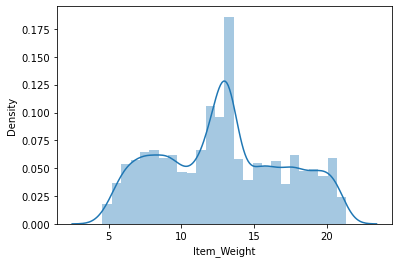

In [55]:
#handling eda for numerical columns
#distribuution for Item Weight column... This will enlighten us about the way this particular column is distributed... 
sns.distplot(train_df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

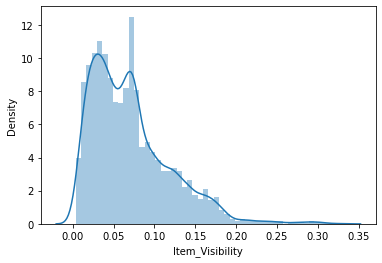

In [205]:
sns.distplot(train_df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

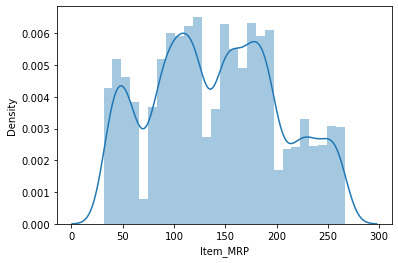

In [60]:
sns.distplot(train_df['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

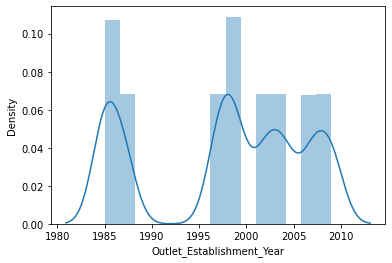

In [61]:
sns.distplot(train_df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

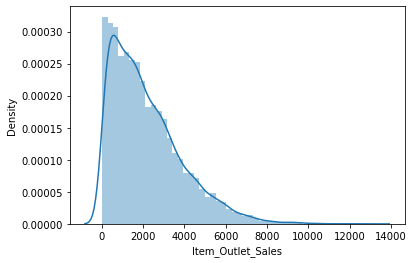

In [62]:
sns.distplot(train_df['Item_Outlet_Sales'])

## Observations

#### Item Weight: 
The item weight distribution seems to be normal. Statistically speaking, we mean the average, meadian and mode are approximately closer.

#### Item Visibility:
The distribution is skewed to the right. What this implies is that most of the items have visibility percent to be around 0.05. This is quite low, higher visibility increases the probability of an item being sold. We will get a better view when we analyze bivariately. 
#### Item MRP:
The distribution is not skewed right or left. It partially follows a normal distribution. MRP simply means maximum retail price of the product.
#### Item_Outlet_sales:
The Item Outlet Sales is right skewed, i.e, most of our salesprice are around 2000. Also, extreme values cannot be treated as outliers, Since some items may cost more than others.












In [64]:
cat_features = train_df.select_dtypes(include = ['object'])
    #to store the columns in a list
cat_list = cat_features.columns.tolist()
cat_list

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

## UNIVARIATE DATA ANALYSIS(Categorical Variable)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

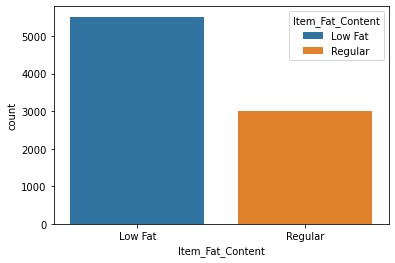

In [108]:
sns.countplot(data = train_df, x = 'Item_Fat_Content', hue = 'Item_Fat_Content', dodge = False)

<AxesSubplot:xlabel='count', ylabel='Item_Type'>

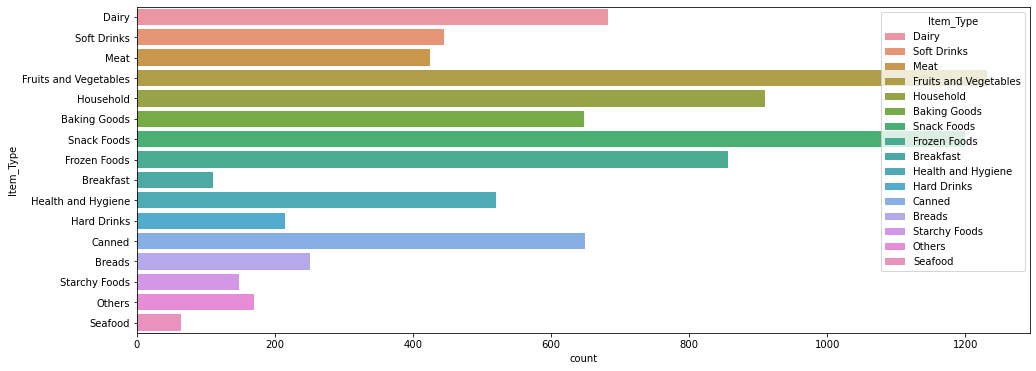

In [110]:
plt.figure(figsize=(16, 6))#adjusting the size of the plot
sns.countplot(data = train_df, y = 'Item_Type', hue = 'Item_Type', dodge = False)#y makes the plot horizontal

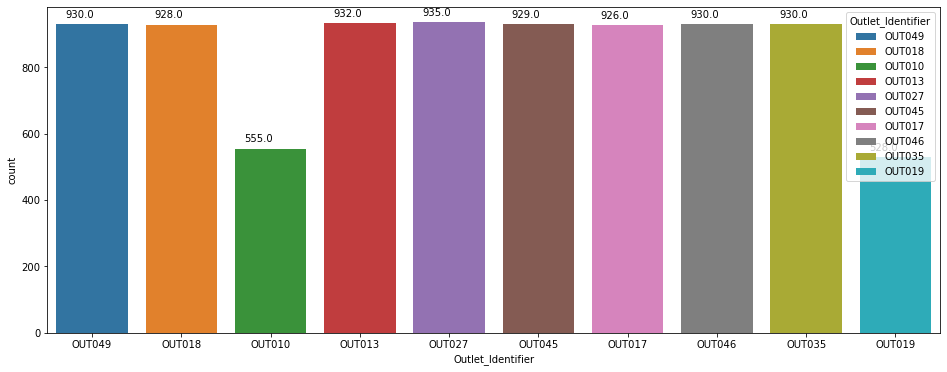

In [89]:
plt.figure(figsize=(16, 6))#adjusting the size of the plot
ax = sns.countplot(data = train_df, x = 'Outlet_Identifier', hue = 'Outlet_Identifier', dodge = False)#y makes the plot horizontal
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+20))



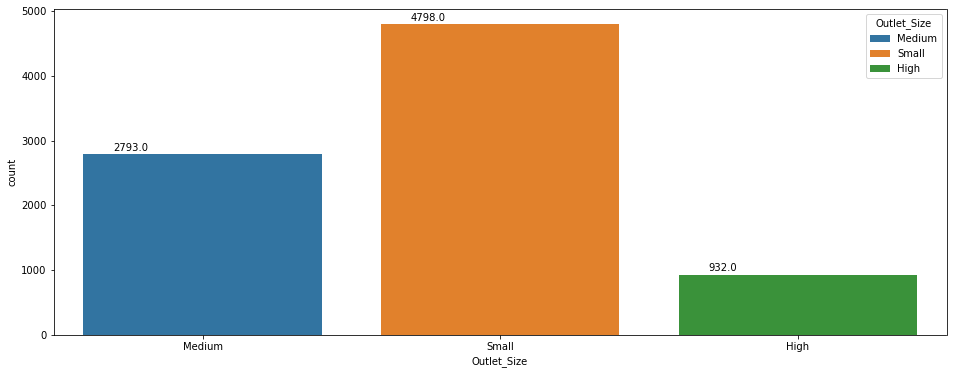

In [85]:
plt.figure(figsize=(16, 6))#adjusting the size of the plot
ax = sns.countplot(data = train_df, x = 'Outlet_Size', hue = 'Outlet_Size', dodge = False)#y makes the plot horizontal
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))



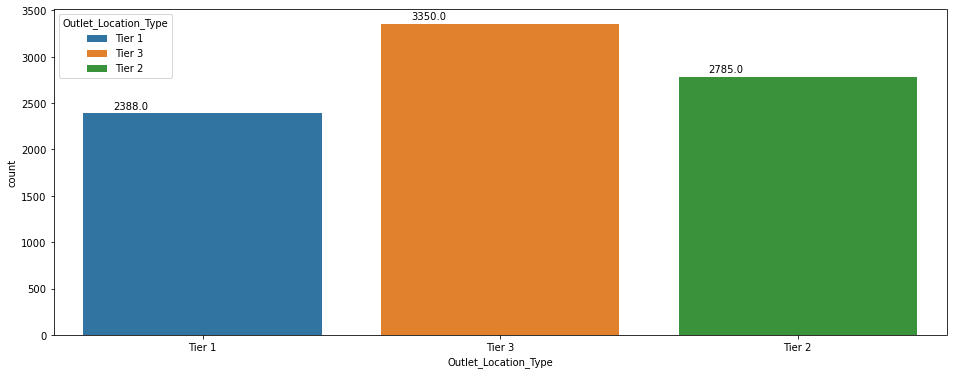

In [91]:
plt.figure(figsize=(16, 6))#adjusting the size of the plot
ax = sns.countplot(data = train_df, x = 'Outlet_Location_Type', hue = 'Outlet_Location_Type', dodge = False)#y makes the plot horizontal
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))



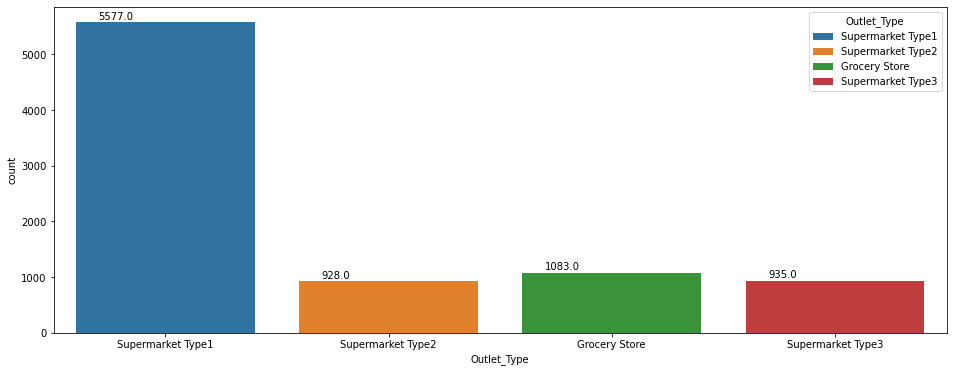

In [92]:
plt.figure(figsize=(16, 6))#adjusting the size of the plot
ax = sns.countplot(data = train_df, x = 'Outlet_Type', hue = 'Outlet_Type', dodge = False)#y makes the plot horizontal
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))



## Observation
#### Item Fat:
The distribution shows us that most of the products sold in the stores are products that contained low fat. 
#### Item Type:
From the distribution, we can see that Fruits and vegetables are the item type that sold most in all of the stores combined.
#### Outlet Identifier:
The distribution of the stores shows that stores with ID OUT010 and OUT019 have lowest records of sales. The reason for this is still unknown.
#### Outlet Size:
From the graph, we can see that Numbers of sales for stores with large size are low. Also, we cannnot be sure of this from the univariate analysis.
#### Outlet Location Type:
The distribution shows that stores located in Tier3 generated high number of sales as compared to Tier1 and Tier2. Tier1 is a location for high income income earners, while Tier3 is a location for middle income earners. The reason why there was a higher record of number of sales may be due to the fact that there are many stores located in that area.
#### Outlet Type:
In this distribution, Supermarket Type1 shows the highest number of sales as compared to other outlet type.


## Bivariate Analysis(Numerical Columns vs Numerical Columns):
We would use a one-stop shop for all the numerical columns. We would do a comparison of all the numerical columns against one another... We would also include a comparison with the target variable. Which is the sales.

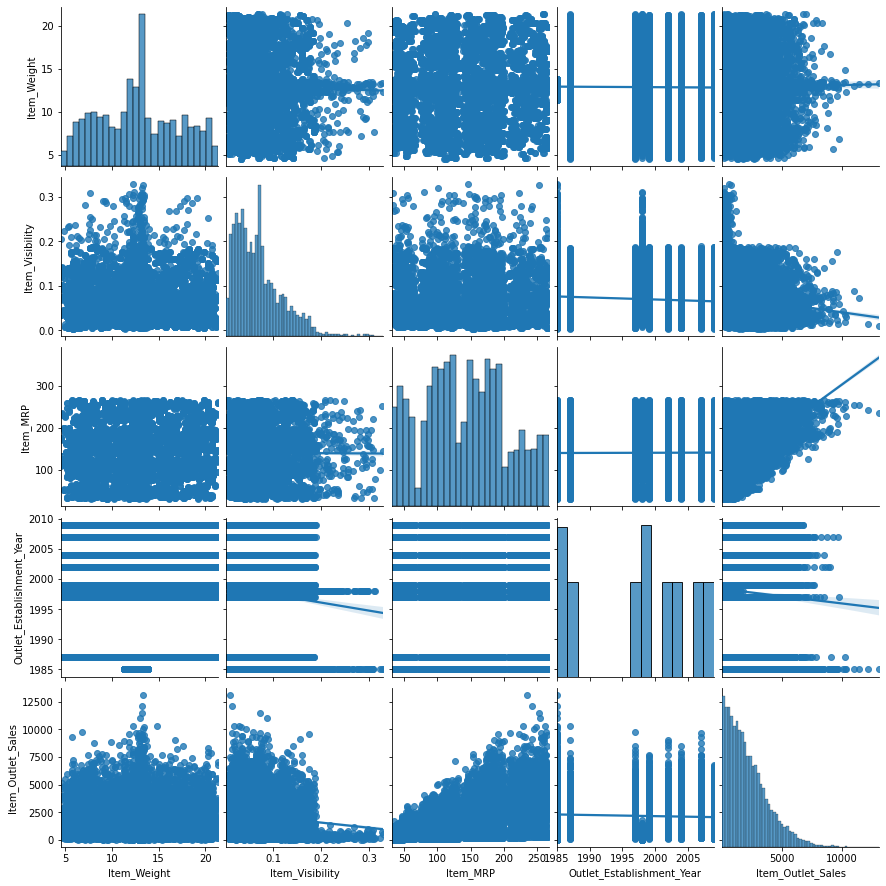

In [206]:
g = sns.pairplot(train_df, kind = 'reg')

## Observation:
From the pair plot above, we can clearly see that except Item MRP which has a strong correlation with the Item_Outlet_Sales, multicolinearity does not exist between the features. We saw this when we calculated the correlation between the features.


##### Note:
We would divide our data into two types, one type would contain numerica features whose values have been transformed and the other type would remain untransformed. The reason for this is, A linear regression model does well on sparse data and data with independence of observations. So we would build two models, A linear regression related model and a model which is not linear.

## Bivariate Analysis(Categorical Columns vs Categorical Columns):

In [111]:
#relationship between Item_Fat_content and Item_type
pd.crosstab(train_df["Item_Fat_Content"], train_df["Item_Type"])

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,329,140,41,341,418,450,630,214,520,910,170,169,37,692,374,82
Regular,319,111,69,308,264,406,602,0,0,0,255,0,27,508,71,66


In [112]:
pd.crosstab(train_df["Outlet_Size"], train_df["Item_Type"])

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Outlet_Size,,,,,,,,,,,,,,,,
High,73,25,13,65,80,92,142,23,61,103,41,16,5,125,49,19
Medium,203,83,36,217,218,274,413,75,170,289,149,52,21,408,137,48
Small,372,143,61,367,384,490,677,116,289,518,235,101,38,667,259,81


In [ ]:
pd.crosstab(train_df["Outlet_Si"], train_df["Item_Type"])

In [113]:
pd.crosstab(train_df["Outlet_Size"], train_df["Outlet_Location_Type"])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,2785,555


In [114]:
pd.crosstab(train_df["Outlet_Size"], train_df["Outlet_Type"])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,1083,3715,0,0


In [118]:
pd.crosstab(train_df["Outlet_Location_Type"], train_df["Item_Type"])

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Outlet_Location_Type,,,,,,,,,,,,,,,,
Tier 1,185,67,33,177,205,250,337,58,138,250,123,56,19,334,120,36
Tier 2,211,84,32,222,214,279,399,72,166,296,125,52,22,401,157,53
Tier 3,252,100,45,250,263,327,496,84,216,364,177,61,23,465,168,59


In [120]:
pd.crosstab(train_df["Outlet_Size"], train_df["Item_Fat_Content"])

Item_Fat_Content,Low Fat,Regular
Outlet_Size,,
High,606,326
Medium,1799,994
Small,3112,1686


In [121]:
pd.crosstab(train_df["Outlet_Identifier"], train_df["Outlet_Size"])

Outlet_Size,High,Medium,Small
Outlet_Identifier,,,
OUT010,0,0,555
OUT013,932,0,0
OUT017,0,0,926
OUT018,0,928,0
OUT019,0,0,528
OUT027,0,935,0
OUT035,0,0,930
OUT045,0,0,929
OUT046,0,0,930


In [122]:
pd.crosstab(train_df["Outlet_Identifier"], train_df["Outlet_Location_Type"])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Identifier,,,
OUT010,0,0,555
OUT013,0,0,932
OUT017,0,926,0
OUT018,0,0,928
OUT019,528,0,0
OUT027,0,0,935
OUT035,0,930,0
OUT045,0,929,0
OUT046,930,0,0


In [123]:
pd.crosstab(train_df["Outlet_Identifier"], train_df["Outlet_Type"])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Identifier,,,,
OUT010,555,0,0,0
OUT013,0,932,0,0
OUT017,0,926,0,0
OUT018,0,0,928,0
OUT019,528,0,0,0
OUT027,0,0,0,935
OUT035,0,930,0,0
OUT045,0,929,0,0
OUT046,0,930,0,0


In [124]:
pd.crosstab(train_df["Outlet_Identifier"], train_df["Item_Type"])

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Outlet_Identifier,,,,,,,,,,,,,,,,
OUT010,42,17,9,35,43,54,79,16,37,67,34,10,4,71,28,9
OUT013,73,25,13,65,80,92,142,23,61,103,41,16,5,125,49,19
OUT017,73,22,12,69,74,106,127,22,61,95,44,16,5,128,54,18
OUT018,68,27,12,78,73,92,135,22,58,95,46,20,7,132,46,17
OUT019,43,16,10,38,49,49,73,8,30,52,32,17,6,75,26,4
OUT027,69,31,11,72,67,89,140,23,60,99,56,15,7,137,45,14
OUT035,68,29,10,79,71,92,129,22,50,102,43,16,8,140,52,19
OUT045,70,33,10,74,69,81,143,28,55,99,38,20,9,133,51,16
OUT046,76,26,10,72,78,108,126,20,56,103,44,22,6,120,48,15


## Observation

#### Item fat content and Item Type:
We noticed that all products in the Health and hygiene category contained low fat, this also applies to products under household categories, hard drinks category and others category. Also, Products in the fruits and vegetables category had the highest number of sales for itmes containing regular fat and low fat. This is due to the fact that this category has the highest number of sales in general.

#### Outlet size and item type:
We can see that the stores that covered large area of land actually had the lowest number of sales for all item types. This is contradicting  one of our initial assumption that larger stores will sell more. Quite suprisingly, stores that covered low area of land space had the highest number of sales for all item types.

#### Outlet location Type and Outlet size:
The stores with large size actually has stores in Tier3 alone. Tier3 is considered to be a location where majority of people staying there are low income earners. We noticed from previous analysis that stores with large sizes did not record too many sales, this may be because most people in that location could not easily get to those stores or there are competitions with other stores in those location. We will find out more as we go on.
We also noticed that stores with small sizes were present in all Tiers, this could be a reason why we have noticed a high number of records of sales from those stores.

#### Outlet Type and Outlet size:
The stores with large size are all Supermarket type1, which means there is no grocery store of large size. We also noticed that small sized stores are the only stores that are grocery stores. Also, medium sized stores are the only stores that are supermarkets type3 and type2. Also, Stores with small sizes had the highest number of records of sales for supermarket type1.

#### Outlet type and item type:
Stores in Tier3 had the highest number of sales for all product types. Stores in Tier1 had the lowest number of sales records for most products type.

Note also that Stores with ID OUT010 and OUT019  had low records for number of sales for all product types. They are both Grocery stores, and 010 is in Tier3 and 019 is in Tier1



## Bivariate Analysis(Categorical Columns vs Numerical Columns):

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Type'>

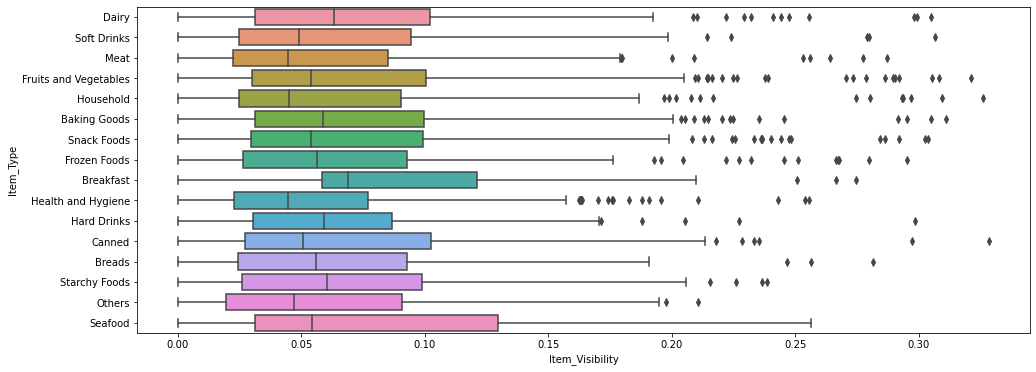

In [126]:
plt.figure(figsize=(16, 6))
sns.boxplot(y = 'Item_Type', x = 'Item_Visibility', data = train_df) 

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

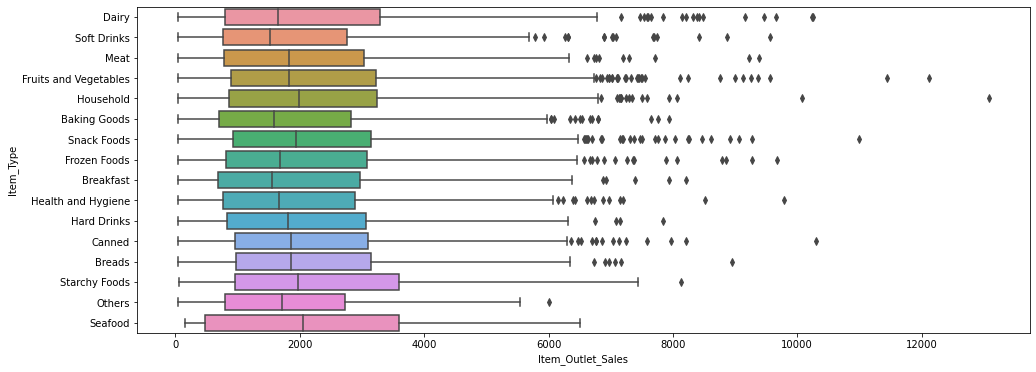

In [127]:
plt.figure(figsize=(16, 6))
sns.boxplot(y = 'Item_Type', x = 'Item_Outlet_Sales', data = train_df) 

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

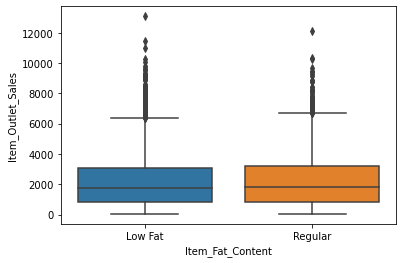

In [129]:
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = train_df) 

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Visibility'>

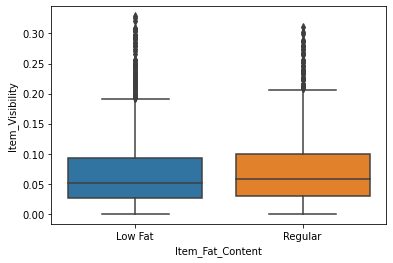

In [130]:
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Visibility', data = train_df) 

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Type'>

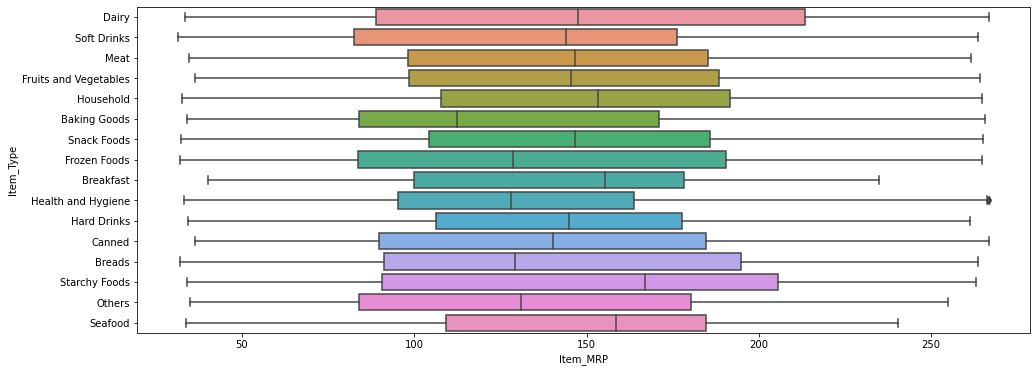

In [131]:
plt.figure(figsize=(16, 6))
sns.boxplot(y = 'Item_Type', x = 'Item_MRP', data = train_df) 

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_MRP'>

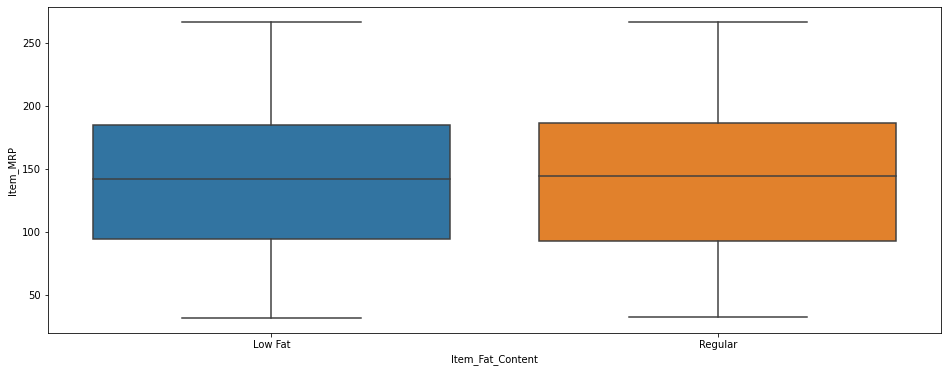

In [133]:
plt.figure(figsize=(16, 6))
sns.boxplot(x= 'Item_Fat_Content', y = 'Item_MRP', data = train_df) 

## Observations

#### High  and low Visibility:
We noticed that some of the following item types had high visibility. These item types include, Fruits and vegetables, Breakfast, Seafood, Dairy, Breads and Canned. The following item types had low visibility, Others and Health and Hygiene

Seafood's high visibilty came as a suprise as number of sales was quite low, but we also noticed that the 50th percentile of selling price of seafood items was above 2000... This is a bit high as compared to other item types. 

Also, there were so many values acting as outliers for majority of the itmes selling price.

## Multivariate Analysis

In [153]:
#average selling price
table = (pd.pivot_table(train_df,index=["Outlet_Location_Type","Outlet_Identifier", "Item_Type"],values=["Item_Outlet_Sales"]))
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
print_full(table)

                                                              Item_Outlet_Sales
Outlet_Location_Type Outlet_Identifier Item_Type                               
Tier 1               OUT019            Baking Goods                  328.688428
                                       Breads                        309.222487
                                       Breakfast                     376.243580
                                       Canned                        440.514305
                                       Dairy                         329.475886
                                       Frozen Foods                  311.281882
                                       Fruits and Vegetables         329.507156
                                       Hard Drinks                   221.045600
                                       Health and Hygiene            364.836207
                                       Household                     349.173688
                                       M

In [158]:
table_2 = (pd.pivot_table(train_df,index=["Outlet_Location_Type","Outlet_Type","Outlet_Identifier", "Item_Type"],values=["Item_Outlet_Sales"]))
print_full(table_2)

                                                                                Item_Outlet_Sales
Outlet_Location_Type Outlet_Type       Outlet_Identifier Item_Type                               
Tier 1               Grocery Store     OUT019            Baking Goods                  328.688428
                                                         Breads                        309.222487
                                                         Breakfast                     376.243580
                                                         Canned                        440.514305
                                                         Dairy                         329.475886
                                                         Frozen Foods                  311.281882
                                                         Fruits and Vegetables         329.507156
                                                         Hard Drinks                   221.045600
                    

## Observation:

#### Outlet location type vs Outlet identifier vs Item type vs Item Outlet sales:
We are trying to see how location affects the sales price. We noticed that the average prices of items were smaller in stores with ID OUT019 and OUT010 compared to othere stores irrespective of the Tiers. But after further analysis, we come to realize that stores with these IDs are grocery stores. One thing to also notice is that they are all small in size. This may be the reason why we have the average prices to be small compared to the supermarkets.

## Feature Engineering 1(for linear models)

#### Numerical Columns

In [164]:
#applying log to the skewed feature

#train_df['Item_visibility_log'] = np.log10(train_df['Item_Visibility']) 

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

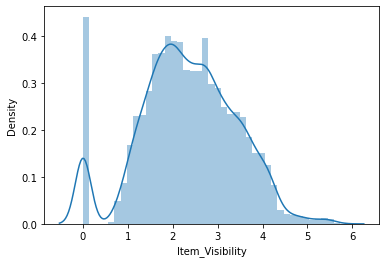

In [167]:
#def round_int(x):
    #if x == float("inf") or x == float("-inf"):
        #return float(x) # or x or return whatever makes sense
    #return int(round(x))

# Because the values of Item visibility are small.. using squareroots to unskew them is the best method
train_df['Item_Visibility']=train_df['Item_Visibility'].apply(lambda x: np.sqrt(x))
sns.distplot(train_df['Item_Visibility'])

In [210]:
train_df['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.073719
4       0.064963
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales_log', ylabel='Density'>

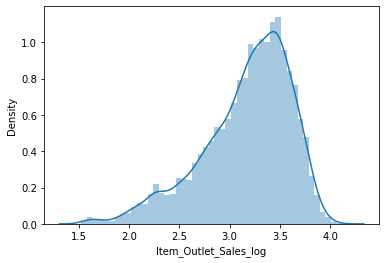

In [168]:
train_df['Item_Outlet_Sales_log'] = train_df['Item_Outlet_Sales'].apply(lambda x: np.log10(x))
sns.distplot(train_df['Item_Outlet_Sales_log'])

In [ ]:
#Filling the item_visibility whose value = 0 with mean of their respective item type


#### Categorical Columns

In [211]:
#we want to make sure that categories in the test data are the same in the training data
cat_features = train_df.select_dtypes(include = ['object'])
    #to store the columns in a list
cat_list = cat_features.columns.tolist()
for col in cat_list:
    df_train_col = train_df[col].unique() #get the unique categories in that particular column
    df_test_col = test_df[col].unique()
    print('Categories Not in Test' + col + ' ', [i for i in df_train_col if i not in df_test_col])
    print('Categories Not in Train' + col + ' ',  [i for i in df_test_col if i not in df_train_col])
    print('**'* 35)

Categories Not in TestItem_Identifier  ['FDX20', 'FDG33', 'FDW13', 'FDG24', 'DRE49', 'NCY18', 'FDO19', 'FDL34', 'FDO52', 'NCL31', 'FDA04', 'NCQ06', 'FDT07', 'FDL10', 'FDX04', 'FDU19']
Categories Not in TrainItem_Identifier  []
**********************************************************************
Categories Not in TestItem_Fat_Content  []
Categories Not in TrainItem_Fat_Content  []
**********************************************************************
Categories Not in TestItem_Type  []
Categories Not in TrainItem_Type  []
**********************************************************************
Categories Not in TestOutlet_Identifier  []
Categories Not in TrainOutlet_Identifier  []
**********************************************************************
Categories Not in TestOutlet_Size  []
Categories Not in TrainOutlet_Size  []
**********************************************************************
Categories Not in TestOutlet_Location_Type  []
Categories Not in TrainOutlet_Location_Type  

In [212]:
cat_features_1 = X.select_dtypes(include = ['object'])
    #to store the columns in a list
cat_list_1 = cat_features_1.columns.tolist()
for col in cat_list_1:
    df_train_col = X[col].unique() #get the unique categories in that particular column
    df_test_col = X_test[col].unique()
    print('Categories Not in Test' + col + ' ', [i for i in df_train_col if i not in df_test_col])
    print('Categories Not in Train' + col + ' ',  [i for i in df_test_col if i not in df_train_col])
    print('**'* 35)

Categories Not in TestItem_Fat_Content  []
Categories Not in TrainItem_Fat_Content  []
**********************************************************************
Categories Not in TestItem_Type  []
Categories Not in TrainItem_Type  []
**********************************************************************
Categories Not in TestOutlet_Identifier  []
Categories Not in TrainOutlet_Identifier  []
**********************************************************************
Categories Not in TestOutlet_Size  []
Categories Not in TrainOutlet_Size  []
**********************************************************************
Categories Not in TestOutlet_Location_Type  []
Categories Not in TrainOutlet_Location_Type  []
**********************************************************************
Categories Not in TestOutlet_Type  []
Categories Not in TrainOutlet_Type  []
**********************************************************************


In [213]:
#dropping the target column and some unwanted columns before encoding
X = train_df.drop(["Item_Identifier", "Item_Outlet_Sales"], axis =1)
y = (train_df["Item_Outlet_Sales"])

X_test =test_df.drop(["Item_Identifier"], axis = 1)

In [215]:
X.shape, X_test.shape

((8523, 10), (5681, 10))

In [216]:
X_dumy= pd.get_dummies(X)
X_test_dummy = pd.get_dummies(X_test)

In [217]:
X_dumy.shape, X_test_dummy.shape

((8523, 42), (5681, 42))

## Modelling Stage


In [222]:
#linear models
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import std
model_1 = LinearRegression()
scores_1 = cross_val_score(model_1, X_dumy, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
print('root Mean squared error: %.3f (%.3f)' % (np.sqrt(-1*(mean(scores_1))), std(scores_1)))

root Mean squared error: 1132.702 (31219.808)


<AxesSubplot:>

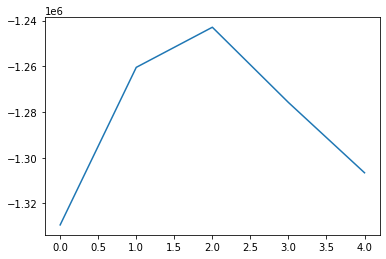

In [226]:
sns.lineplot(data=scores_1)

In [224]:
from sklearn.linear_model import Ridge
model_2 = Ridge(alpha = 0.01)
scores_2 = cross_val_score(model_2, X_dumy, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
print('root Mean squared error: %.3f (%.3f)' % (np.sqrt(-1*(mean(scores_2))), std(scores_2)))

root Mean squared error: 1132.702 (31219.930)


<AxesSubplot:>

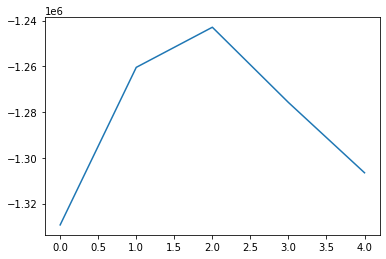

In [227]:
sns.lineplot(data=scores_2)

In [225]:
from sklearn.ensemble import RandomForestRegressor
model_3 =RandomForestRegressor(n_estimators = 200, max_depth = 10, random_state = 42) 
scores_3 = cross_val_score(model_3, X_dumy, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
print('root Mean squared error: %.3f (%.3f)' % (np.sqrt(-1*(mean(scores_3))), std(scores_3)))

root Mean squared error: 1097.474 (14050.167)


<AxesSubplot:>

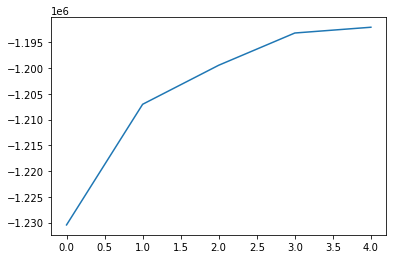

In [228]:
sns.lineplot(data=scores_3)

In [231]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_dumy, y, test_size=0.1, random_state=13)

In [234]:
model_3 =RandomForestRegressor(n_estimators = 200, max_depth = 10, random_state = 42) 
model_3.fit(X_train, y_train)
mse = mean_squared_error(y_test, model_3.predict(X_test))
rmse = np.sqrt(mse)
print("The Root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

The Root mean squared error (RMSE) on test set: 1128.2584


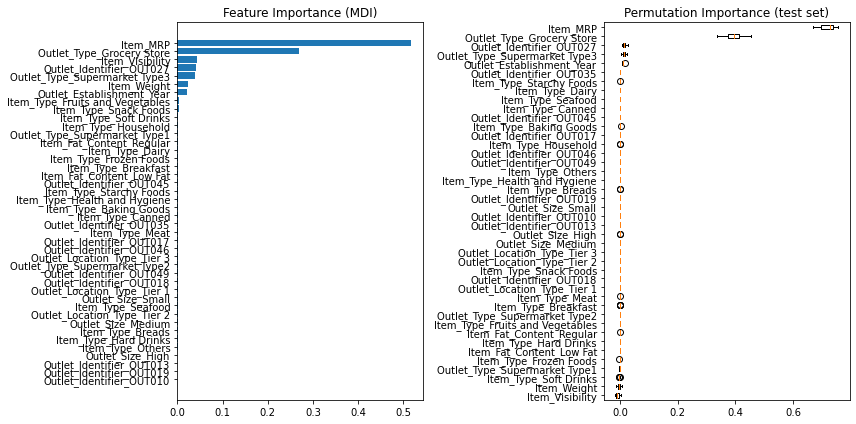

In [237]:
feature_importance = model_3.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_dumy.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(model_3, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X_dumy.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()